In [1]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


w[0]: 0.393906  b: -0.031804


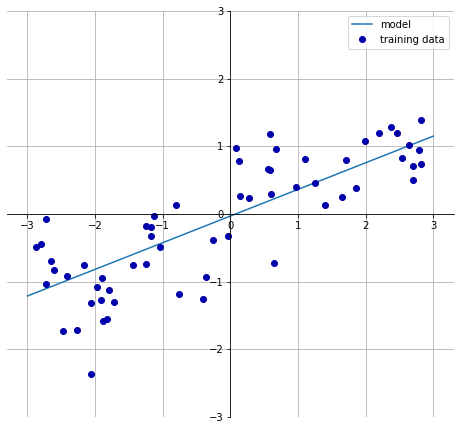

In [3]:
mglearn.plots.plot_linear_regression_wave()


In [4]:
### Linear Regression, ordinary least squares
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [7]:
# The scores of the training and test sets are close, which mean we are underfitting

In [8]:
# Lets try higher dimensional dataset such as the Boston Housing Dataset with 506 samples and 104 derived features.
X, y = mglearn.datasets.load_extended_boston()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
                                                   

In [10]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [11]:
### Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [12]:
# Raising alpha to restrict coefficients, High alpha decreases training set performance but might help generalization
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [13]:
# Lowering alpha to de-restrict coefficients, which causes use to move right in the model complexity graph 2-1.  very small
# alpha values mimics Linear regression
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


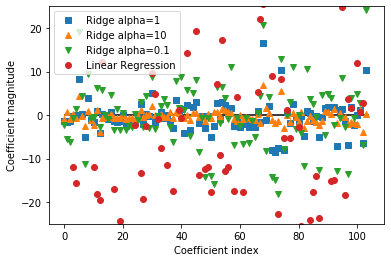

In [14]:
# Looking at the effect of different alpha values
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_,'o', label="Linear Regression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

In [15]:
### Lasso:  Has the ability to do feature selection by setting non important features coefficients to zer

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [18]:
# Clearly we are underfitting here since both training and test score has terrible performance
# Also indicated by the number of features used (4) out of 104, clearly the model is too simple.

(379, 104)

In [20]:
# we increase the default seting of "max_iter",
# otherwise the model would warn us that we should increase max_iter when lowering alpha:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of feautres used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of feautres used: 33


In [21]:
# This is better performance, greater number of features used means we have a more complex model to avoid underfitting
# this makes the model potentially more easier to understand as a result.

# Nows lets see what happens when we set the alpha too low, we remove the effect of regularization and end up overfitting
# and get a result close to LinearRegression

In [22]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of feautres used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of feautres used: 96


Text(0, 0.5, 'Coefficient magnitude')

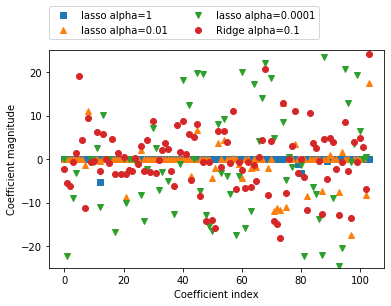

In [25]:
# Looking at the effect of different alpha values
plt.plot(lasso.coef_,'s', label="lasso alpha=1")
plt.plot(lasso001.coef_,'^', label="lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")